In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [2]:
def read_sum_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../lstm/SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "summation_" + str(window_size)
                final_full_path = os.path.join(path, dir, window_dir, "final_topk_summation.txt")    
                dynamic_full_path = os.path.join(path, dir, window_dir, "dynamic_topk_summation.txt")    
                
                with open(final_full_path, 'r') as f:
                    line = f.readline().strip()
                    final_list = [int(num) for num in line.split()]
                    res.append(final_list)
                    
                with open(dynamic_full_path, 'r') as f:
                    line = f.readline().strip()
                    dynamic_list = [int(num) for num in line.split()]
                    res.append(dynamic_list)
            
    return res

# read_sum_data()

In [3]:
def read_total_size_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida20180517_10_caida20180816_0.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../lstm/SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir,'total_flow_size.txt')    
                with open(full_path, 'r') as f:
                    for val in f:
                        res.append(int(val))
            
    return res

# read_total_size_data()

In [4]:
def read_gt_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../lstm/SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "summation_" + str(window_size)
                gt_full_path = os.path.join(path, dir, window_dir, "gt_topk_summation.txt")    
                
                with open(gt_full_path, 'r') as f:
                    line = f.readline().strip()
                    res = [int(num) for num in line.split()]
                    # res.append(final_list)
            
    return res

# read_gt_data()

## Prepare Dataset

In [114]:
## parameters

name1 = ["zipf2a", "zipf4", "zipf2b"]
name2 = ["caida20180816", "caida20180517", "caida20180621"]

# lens = [["3", "7"],
#         ["4", "6"],
#         ["5", "5"],
#         ["6", "4"],
#         ["7", "3"],
#         ["8", "2"],]

# lens = [["4", "6"],
#         ["5", "5"],
#         ["6", "4"],
#         ["7", "3"],
#         ["8", "2"],]

lens = [["5", "5"],
        ["6", "4"],
        ["7", "3"],
        ["8", "2"],]

pcap_file = []
    
# # single dataset
# pcap_file.append("caida20180621_10_caida20180816_0.pcap")

# pcap_file.append("caida20180517_10_caida20180816_0.pcap")
# pcap_file.append("caida20180816_10_caida20180816_0.pcap")
# pcap_file.append("zipf2a_10_caida20180816_0.pcap") 
# pcap_file.append("zipf2b_10_caida20180816_0.pcap") 
# pcap_file.append("zipf4_10_caida20180816_0.pcap")


# # caida + caida
# for l in lens:
#     name = f'{name2[0]}_{l[0]}_{name2[1]}_{l[1]}.pcap'
#     pcap_file.append(name)
    
# for l in lens:
#     name = f'{name2[0]}_{l[0]}_{name2[2]}_{l[1]}.pcap'
#     pcap_file.append(name)
    

# # # caida + zipf
# for n1 in name1:
#     for l in lens:
#         name = f'{name2[0]}_{l[0]}_{n1}_{l[1]}.pcap'
#         pcap_file.append(name)
        
# for n1 in name1:
#     for l in lens:
#         name = f'{name2[1]}_{l[0]}_{n1}_{l[1]}.pcap'
#         pcap_file.append(name)
#         name = f'{name2[2]}_{l[0]}_{n1}_{l[1]}.pcap'
#         pcap_file.append(name)


# # # zipf + caida
for n1 in name1:
    for n2 in name2[0:2]:
        for l in lens:
            name = f'{n1}_{l[0]}_{n2}_{l[1]}.pcap'
            pcap_file.append(name)

for n1 in name1:
    for l in lens:
        name = f'{n1}_{l[0]}_{name2[2]}_{l[1]}.pcap'
        pcap_file.append(name)

print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['zipf2a_5_caida20180816_5.pcap', 'zipf2a_6_caida20180816_4.pcap', 'zipf2a_7_caida20180816_3.pcap', 'zipf2a_8_caida20180816_2.pcap', 'zipf2a_5_caida20180517_5.pcap', 'zipf2a_6_caida20180517_4.pcap', 'zipf2a_7_caida20180517_3.pcap', 'zipf2a_8_caida20180517_2.pcap', 'zipf4_5_caida20180816_5.pcap', 'zipf4_6_caida20180816_4.pcap', 'zipf4_7_caida20180816_3.pcap', 'zipf4_8_caida20180816_2.pcap', 'zipf4_5_caida20180517_5.pcap', 'zipf4_6_caida20180517_4.pcap', 'zipf4_7_caida20180517_3.pcap', 'zipf4_8_caida20180517_2.pcap', 'zipf2b_5_caida20180816_5.pcap', 'zipf2b_6_caida20180816_4.pcap', 'zipf2b_7_caida20180816_3.pcap', 'zipf2b_8_caida20180816_2.pcap', 'zipf2b_5_caida20180517_5.pcap', 'zipf2b_6_caida20180517_4.pcap', 'zipf2b_7_caida20180517_3.pcap', 'zipf2b_8_caida20180517_2.pcap', 'zipf2a_5_caida20180621_5.pcap', 'zipf2a_6_caida20180621_4.pcap', 'zipf2a_7_caida20180621_3.pcap', 'zipf2a_8_caida20180621_2.pcap', 'zipf4_5_caida20180621_5.pcap', 'zipf4_6_caida20180621_4.pcap', 'zipf4_7_caida20180

### Plot Total Flow Size

In [6]:
def plot_single_total_size(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=500):
    
    # labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Var", "Dynamic TopK Var", "Final TopK Sec Var", "Dynamic TopK Sec Var"]
    # labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Sec Var", "Dynamic TopK Sec Var"]
    labels = ["Final TopK Sum", "Final TopK Sec Var",]

    res = []
    # sum
    result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    # res.append(result)
    
    # variation
    fin_res_var = [None]
    for i in range(1, len(result)):
        fin_res_var.append(result[i] - result[i-1])
        
    # res.append(fin_res_var)
    
    # second variation
    fin_sec_res_var = [None, None]
    for i in range(2, len(result)):
        fin_sec_res_var.append(abs(fin_res_var[i] - fin_res_var[i-1]))
        
    res.append(fin_sec_res_var)
    
    print(labels, len(labels))
    print(res, len(res))
    print(result)
    print(fin_res_var)
    print(fin_sec_res_var, len(res))
    print(f'max: {max(fin_res_var[1:])}, avg: {sum(fin_res_var[1:])/len(fin_res_var[1:])}, diff: {max(fin_res_var[1:]) - (sum(fin_res_var[1:])/len(fin_res_var[1:]))}')
    
    plt.figure(figsize=(12, 4))
    
    # sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
    #     plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    # print(dataset)
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Flow Size Variation (Window Size = %d)' % (dataset[:-5], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

# datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
datasets = ["zipf2a_3_caida20180517_7.pcap/"]
# window_sizes = [100, 200, 500]
window_sizes = [200]
# plot_single_both(dataset=pcap_file[4], window_size=200)
# plot_single_both(dataset=datasets[0], window_size=500)

['Final TopK Sum', 'Final TopK Sec Var'] 2
[[None, None, 12573, 4382, 1350, 499, 295, 571, 927, 2182, 1513, 1359, 111, 1988, 269, 32, 34, 2615, 449, 144, 132, 587, 892, 771, 281, 156, 371, 331, 469, 459, 93, 205, 325, 1242, 1208, 502, 435, 287, 440, 1440, 2890, 102190, 6706, 36563, 28825, 819, 314, 6116, 45033]] 1
[0, 32072, 51571, 66688, 80455, 93723, 107286, 120278, 132343, 146590, 159324, 170699, 182185, 191683, 200912, 210173, 219400, 231242, 242635, 253884, 265001, 276705, 287517, 299100, 310964, 322672, 334009, 345015, 355552, 366548, 377637, 388521, 399730, 409697, 418456, 426713, 435405, 443810, 451775, 461180, 473475, 587960, 695739, 766955, 866996, 967856, 1069030, 1176320, 1238577]
[None, 32072, 19499, 15117, 13767, 13268, 13563, 12992, 12065, 14247, 12734, 11375, 11486, 9498, 9229, 9261, 9227, 11842, 11393, 11249, 11117, 11704, 10812, 11583, 11864, 11708, 11337, 11006, 10537, 10996, 11089, 10884, 11209, 9967, 8759, 8257, 8692, 8405, 7965, 9405, 12295, 114485, 107779, 71216,

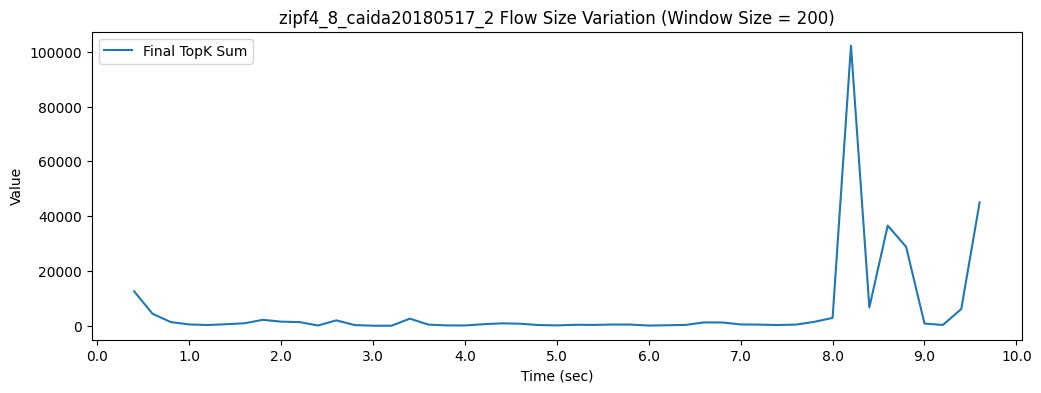

In [7]:
# changing_time_predict_final_topk(width=widths, datasets=pcap_file)
# plot_single_final_topk(dataset=pcap_file[0], type_="accumulate.txt", window_size=200)

# predict_final_dynamic_topk(width=widths, datasets=pcap_file)
# plot_both_topk(dataset=pcap_file[0], window_size=200)

# predict_with_total_size(width=widths, datasets=pcap_file)
plot_single_total_size(dataset=pcap_file[3], window_size=200)

### Predict Final TopK & Dynamic TopK & GT TopK & Total Flow Size

In [89]:
def changes_occured(var, sec_var, n, ws=20):
    
    time_var = -1.0
    time_sec_var = -1.0
    
    val = 0
    max_time = -1.0
    
    # for each sliding window
    for i in range(len(var) - ws + 1):
        var_mean = np.mean(var[0+i:ws+i])
        var_std_dev = np.std(var[0+i:ws+i])
        
        # check by var outliers
        if abs(var[ws+i-1] - var_mean) > (n * var_std_dev):
            if time_var == -1.0:
                time_var = (1+(ws+i-1)-1)/5
                break
                
    for i in range(len(sec_var) - ws + 1):            
        sec_var_mean = np.mean(sec_var[0+i:ws+i])
        sec_var_std_dev = np.std(sec_var[0+i:ws+i])
        
        # check by sec var outliers
        if abs(sec_var[ws+i-1] - sec_var_mean) > (n * sec_var_std_dev):
            if time_sec_var == -1.0:
                time_sec_var = (2+(ws+i-1)-1)/5
                val = sec_var[ws+i-1]
                break
                
    if val == 0:
        val = max(sec_var)
        max_time = (2 + sec_var.index(val) - 1)/5
        
    
    var_hit = 0
    sec_var_hit = 0
    
    if time_var != -1.0:
        var_hit = 1
    if time_sec_var != -1.0:
        sec_var_hit = 1
    
    return var_hit, time_var, sec_var_hit, time_sec_var, val, max_time
    
    

In [53]:
def predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200, dev=3, ws=20):
    
    # total flow size
    res_sum3 = {}
    res_var3 = {}
    res_sec_var3 = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_var3[name] = [None]
            res_sec_var3[name] = [None, None]
            
            res_total = read_total_size_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_sum3[name] = res_total
            
            for i in range(1, len(res_total)):
                res_var3[name].append(res_total[i] - res_total[i-1])
                
            for i in range(2, len(res_var3[name])):
                res_sec_var3[name].append(abs(res_var3[name][i] - res_var3[name][i-1]))
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    # print(label, len(label))
    # print(res_sum, len(res_sum))
    # print(res_var, len(res_var))
    # print(res_sec_var, len(res_sec_var))
    
    # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    # ws = 20
    
    pred3 = []
    
    norm_hit3 = 0
    iqr_hit3 = 0
    
    hit3 = []
    
    for i in range(len(label)):
        
        var_hit, time_var, sec_var_hit, time_sec_var, val, max_time = changes_occured(res_var3[label[i]][1:], res_sec_var3[label[i]][2:], dev, ws)
        
        pred3.append(time_sec_var)
           
        print(i)
        print(label[i])
        print('\tTotal Flow ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        print('\t\t', res_sec_var3[label[i]])
        print(f'\t\tvar: {time_var}, ans: {answer[i]}, change: {var_hit}')
        print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        print(f'\t\t{val}, max time: {max_time}')
        print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit3.append(1)
            else:
                hit3.append(0)
        else:
            if sec_var_hit == 1:
                hit3.append(1)
            else:
                hit3.append(0)
            
        

    succ3 = 0

    for i in range(len(label)):
        if hit3[i] == 1:
            if answer[i] == 10:
                succ3 += 1
            else:
                if abs(pred3[i] - answer[i]) <= 1.0:
                    succ3 += 1
    
    print("single comprehensive predict")
    print(f' total flow  predict: {succ3}/{len(pred3)} {succ3*100/len(pred3)}%')
    print()
    
    
    
    
        
# predict_final_dynamic_topk(width=widths, datasets=pcap_file)

In [115]:
predict(width=widths, datasets=pcap_file, window_size=200, dev=3, ws=25)

0
zipf2a_5_caida20180816_5_4096
	Total Flow 
		 [None, None, 3618, 2791, 6045, 3855, 957, 2559, 2097, 1719, 1245, 3994, 3928, 5376, 99, 4009, 1431, 4587, 50, 940, 964, 521, 213, 3306, 3415, 1602, 88820, 6475, 7164, 4401, 7005, 2349, 2754, 2567, 834, 5688, 5902, 528, 4234, 4038, 4822, 582, 3354, 1197, 2959, 3984, 532, 93, 3695, 3470, 2452]
		var: 5.0, ans: 5, change: 1
		sec var: 5.0, ans: 5, change: 1
		88820, max time: -1.0

1
zipf2a_6_caida20180816_4_4096
	Total Flow 
		 [None, None, 3618, 2791, 6045, 3855, 957, 2559, 2097, 1719, 1245, 3994, 3928, 5376, 99, 4009, 1431, 4587, 50, 940, 964, 521, 213, 3306, 3415, 1753, 538, 1304, 205, 2989, 70, 86890, 6449, 7144, 4407, 7019, 2358, 2751, 2564, 838, 5686, 5909, 525, 4240, 4051, 4810, 584, 3353, 1209, 2955, 4232]
		var: 6.0, ans: 6, change: 1
		sec var: 6.0, ans: 6, change: 1
		86890, max time: -1.0

2
zipf2a_7_caida20180816_3_4096
	Total Flow 
		 [None, None, 3618, 2791, 6045, 3855, 957, 2559, 2097, 1719, 1245, 3994, 3928, 5376, 99, 4009,